In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats

In [2]:
%matplotlib inline
sns.set_theme()
countries = {"Germany": "D",
             "Austria": "A",
             "Belgium" : "B",
             "Spain": "E",
             "France": "F",
             "Italy": "I",
             "Luxembourg": "L",
             "Netherlands": "NL"}

### Load Dataset

In [3]:
file_path = os.path.join("data", "autoscout_dataset.csv")
df = pd.read_csv(file_path, sep=";", index_col="url")

In [6]:
df['Anno'] = pd.to_datetime(df['Anno'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438 to volkswagen-tiguan-tiguan-2-0-bitdi-executiv-r-line-4motion-240cv-dsg-diesel-bianco-b052719e-af99-45f9-a13d-cef11e8f0518
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Acconto                  4659 non-null   float64       
 1   Anno                     4477 non-null   datetime64[ns]
 2   Carburante               4750 non-null   object        
 3   Carrozzeria              4750 non-null   object        
 4   Chilometraggio           4627 non-null   float64       
 5   Cilindrata_cm3           4212 non-null   float64       
 6   Cilindri                 3947 non-null   float64       
 7   Colore                   4252 non-null   object        
 8   Comfort                  4007 non-null   object      

In [8]:
df.describe()

,Acconto,Chilometraggio,Cilindrata_cm3,Cilindri,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,garanzia_mesi,makeId,modelOrModelLineId,potenza_cv,potenza_kw,price,zip
count,4659.000000,4627.000000,4212.000000,3947.000000,3061.000000,2624.000000,2635.000000,2814.000000,3878.000000,2968.000000,4204.000000,4224.000000,3591.000000,1857.000000,4750.000000,4732.000000,4713.000000,4713.000000,4750.000000,4750.000000
mean,1185.638764,85991.704344,1679.464862,3.951609,5.344887,4.641692,6.489146,126.214996,6.055441,1443.117925,4.555186,4.769886,15400.167920,15.936457,1538.691579,20429.313398,137.950987,101.403777,24233.375368,36914.215158
std,3125.752926,70756.962656,644.446984,0.856056,1.862958,1.963923,2.748140,41.738964,1.390587,418.567453,0.864368,0.794298,7436.882791,9.973794,5841.144438,20577.081852,72.536306,53.345605,28498.999941,23708.347493
min,0.000000,0.000000,0.000000,0.000000,1.100000,1.000000,1.000000,0.000000,0.000000,19.000000,1.000000,1.000000,700.000000,0.000000,6.000000,1602.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,32247.000000,1248.000000,4.000000,4.300000,3.900000,5.050000,108.000000,5.000000,1190.000000,4.000000,5.000000,9500.000000,12.000000,28.000000,2092.000000,95.000000,70.000000,11700.000000,20811.000000
50%,0.000000,72900.000000,1598.000000,4.000000,4.900000,4.300000,5.900000,121.000000,6.000000,1415.000000,5.000000,5.000000,14950.000000,12.000000,42.000000,18493.000000,120.000000,88.000000,18400.000000,33080.000000
75%,0.000000,125000.000000,1984.000000,4.000000,5.800000,5.000000,7.200000,140.000000,7.000000,1645.000000,5.000000,5.000000,20965.000000,12.000000,64.000000,20038.000000,155.000000,114.000000,28800.000000,50100.000000
max,40000.000000,940000.000000,12809.000000,12.000000,48.000000,75.000000,65.000000,1100.000000,10.000000,15600.000000,6.000000,9.000000,30000.000000,96.000000,51901.000000,76352.000000,688.000000,506.000000,999999.000000,98158.000000


In [14]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Acconto,Anno,Carburante,Carrozzeria,Chilometraggio,Cilindrata_cm3,Cilindri,Colore,Comfort,Consumo_comb_L100km,Consumo_extraurb_L100km,Consumo_urb_L100km,Emissioni_CO2_gKm,Extra,Intrattenimento__Media,Marce,Peso_a_vuoto_kg,Porte,Posti,Prezzo_auto,Sicurezza,Tagliandi_certificati,Tipo_di_cambio,Tipo_di_veicolo,Trazione,city,country,countryCode,date,garanzia_mesi,makeId,maker,model,modelOrModelLineId,modelVersionInput,potenza_cv,potenza_kw,price,street,unico_proprietario,zip
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
volkswagen-golf-1-6-tdi-90-cv-5p-business-trendline-bluemotion-te-diesel-bianco-c6049f13-3ae4-4944-9f87-da7872956438,0.0,09/2016,Diesel,Berlina,115172.0,1598.0,4.0,Bianco,Alzacristalli elettrici;Climatizzatore;Cruise ...,3.0,3.0,4.0,101.0,Freno di stazionamento elettrico;Marmitta cata...,Autoradio;Bluetooth;CD;USB;Vivavoce,NaN,1312.0,5.0,5.0,14500.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,Anteriore,Bolzano - Bz,Italy,IT,2022-11-05 19:24:48.964971,12.0,74,Volkswagen,Golf,2084.0,1.6 tdi 90 cv 5p. business trendline bluemotio...,90.0,66.0,14500.0,"Via Lancia, 3",False,39100
bmw-430-m-sport-19-navi-pro-tetto-apribile-pdc-keyless-benzina-nero-e6fef875-6ade-407e-ab12-58f424825195,0.0,10/2021,Benzina,Cabrio,10900.0,1998.0,4.0,Nero,Alzacristalli elettrici;Bracciolo;Chiusura cen...,NaN,NaN,NaN,NaN,"Cerchi in lega (19"");Leve al volante;Luce d'am...",Schermo multifunzione interamente digitale;Sou...,8.0,NaN,3.0,5.0,NaN,ABS;Airbag conducente;Airbag laterali;Airbag p...,True,Automatico,Aziendale,Posteriore,Merate - Lecco - LC,Italy,IT,2022-11-05 19:24:49.633149,NaN,13,BMW,430,20330.0,M SPORT -19\,245.0,180.0,62900.0,"Via Sandro Pertini, 23",True,23807
renault-master-t35-2-3-dci-135cv-l2h2-ice-e6d-temp-diesel-bianco-afd0cb83-a5ed-40bc-8627-eb48c94ae24d,0.0,NaN,Diesel,Furgone,0.0,2299.0,4.0,Bianco,Cruise Control;Sensore di luminosità;Sensore d...,6.7,NaN,NaN,177.0,NaN,CD;MP3,6.0,20.0,4.0,3.0,28550.0,Airbag conducente;Airbag laterali;Fari LED,False,Manuale,Nuovo,Anteriore,Porto Mantovano - Mantova - Mn,Italy,IT,2022-11-05 19:24:50.333591,24.0,60,Renault,Master,14717.0,T35 2.3 dci 135cv L2H2 Ice E6d-temp,135.0,99.0,28550.0,Strada Marmirolo 5,False,46047
peugeot-5008-1-6-hdi-8v-business-112cv-diesel-grigio-e95e6b9f-55dc-460f-8c61-6eed529eacc3,0.0,11/2010,Diesel,Monovolume,196000.0,1560.0,4.0,Grigio,Alzacristalli elettrici;Bracciolo;Climatizzato...,5.3,4.6,6.5,NaN,Cerchi in lega;Ruotino,Autoradio;Bluetooth;Computer di bordo;MP3;Soun...,6.0,1547.0,5.0,7.0,5490.0,ABS;Airbag conducente;Airbag laterali;Airbag p...,False,Manuale,Usato,NaN,Motta di Livenza - TV,Italy,IT,2022-11-05 19:24:51.679939,NaN,55,Peugeot,5008,19235.0,1.6 hdi 8v Business 112cv,111.0,82.0,5490.0,Via Piemonte 5,False,31045
stin-healey-3000-mk3-benzina-rosso-99e0017a-354f-4fe3-9273-7c2d83407f10,0.0,01/1964,Benzina,Cabrio,3000.0,3000.0,6.0,Rosso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.0,4.0,NaN,NaN,False,Manuale,Epoca,Posteriore,Roncadelle - Brescia - BS,Italy,IT,2022-11-05 19:24:53.177445,NaN,51901,Austin-Healey,3000,76119.0,mk3,150.0,110.0,64800.0,"Via San Bernardino, 67",False,25030


### Find Missing data

In [10]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize=(12,10))
        plt.show()
    else:
        print('No NAs found')



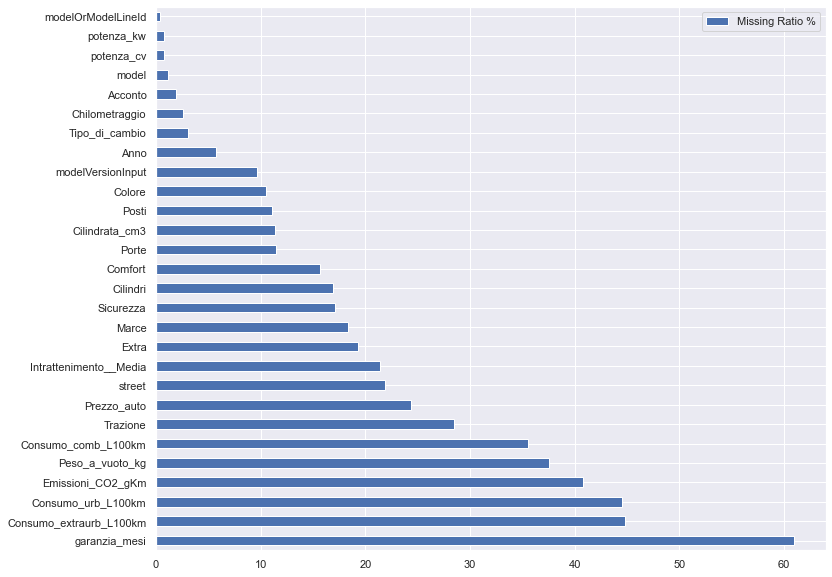

In [11]:
plot_nas(df)

### Value counts for some categorical data

In [12]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in ['maker', 'model', 'Carburante', 'Trazione', 'Tipo_di_cambio', 'Colore']],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [13]:
unique_counts

,Column_Name,Num_Unique
3,Trazione,3
4,Tipo_di_cambio,3
2,Carburante,7
5,Colore,14
0,maker,66
1,model,588


<AxesSubplot:>

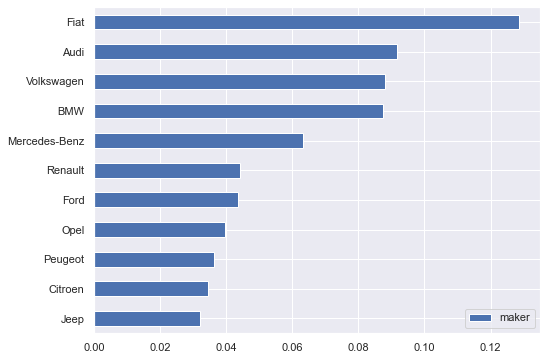

In [14]:
col = 'maker'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

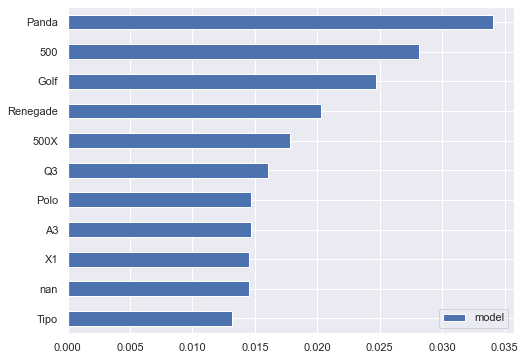

In [39]:
col = 'model'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[10::-1]}).plot(kind='barh', figsize=(8, 6))

<AxesSubplot:>

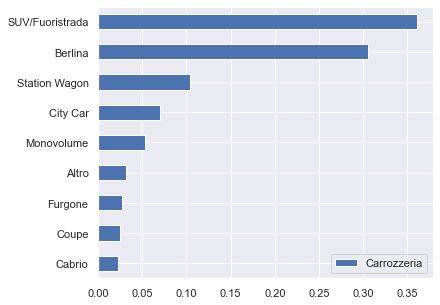

In [19]:
col = 'Carrozzeria'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

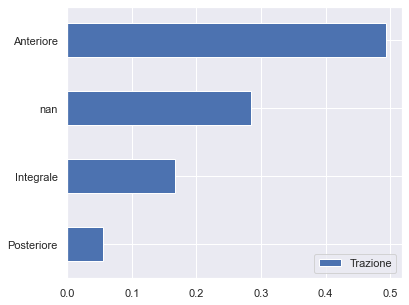

In [15]:
col = 'Trazione'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

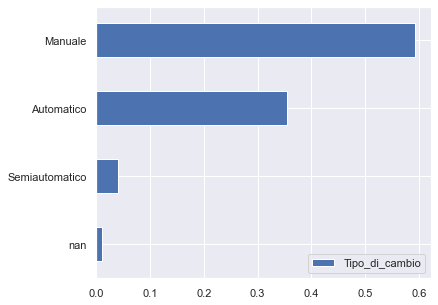

In [22]:
col = 'Tipo_di_cambio'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

<AxesSubplot:>

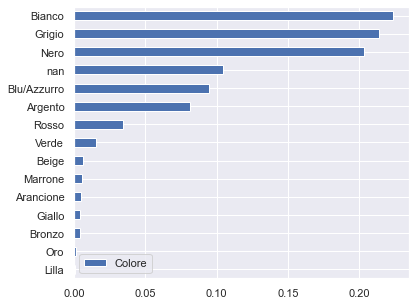

In [16]:
col = 'Colore'
col_counts = df[col].value_counts(dropna=False, normalize=True)
pd.DataFrame({f'{col}' :col_counts[::-1]}).plot(kind='barh', figsize=(6, 5))

### Numerical variables exploration

In [17]:
var_corr = df[['price', 'potenza_kw', 'Cilindrata_cm3', 'Chilometraggio','Consumo_comb_L100km', 'unico_proprietario', 'Peso_a_vuoto_kg', 'Posti', 'garanzia_mesi']].corr()

In [18]:
var_corr

,price,potenza_kw,Cilindrata_cm3,Chilometraggio,Consumo_comb_L100km,unico_proprietario,Peso_a_vuoto_kg,Posti,garanzia_mesi
price,1.000000,0.635060,0.424757,-0.337070,0.262191,-0.044712,0.292843,-0.103771,0.193977
potenza_kw,0.635060,1.000000,0.745585,-0.057390,0.444742,-0.025235,0.525345,0.016696,0.131864
Cilindrata_cm3,0.424757,0.745585,1.000000,0.187904,0.472079,0.016652,0.532853,0.034139,0.030840
Chilometraggio,-0.337070,-0.057390,0.187904,1.000000,0.128358,0.051055,0.051534,0.115878,-0.372512
Consumo_comb_L100km,0.262191,0.444742,0.472079,0.128358,1.000000,-0.054134,0.218718,-0.120757,-0.021852
unico_proprietario,-0.044712,-0.025235,0.016652,0.051055,-0.054134,1.000000,0.014142,0.040170,-0.172922
Peso_a_vuoto_kg,0.292843,0.525345,0.532853,0.051534,0.218718,0.014142,1.000000,0.268841,0.188752
Posti,-0.103771,0.016696,0.034139,0.115878,-0.120757,0.040170,0.268841,1.000000,0.046071
garanzia_mesi,0.193977,0.131864,0.030840,-0.372512,-0.021852,-0.172922,0.188752,0.046071,1.000000


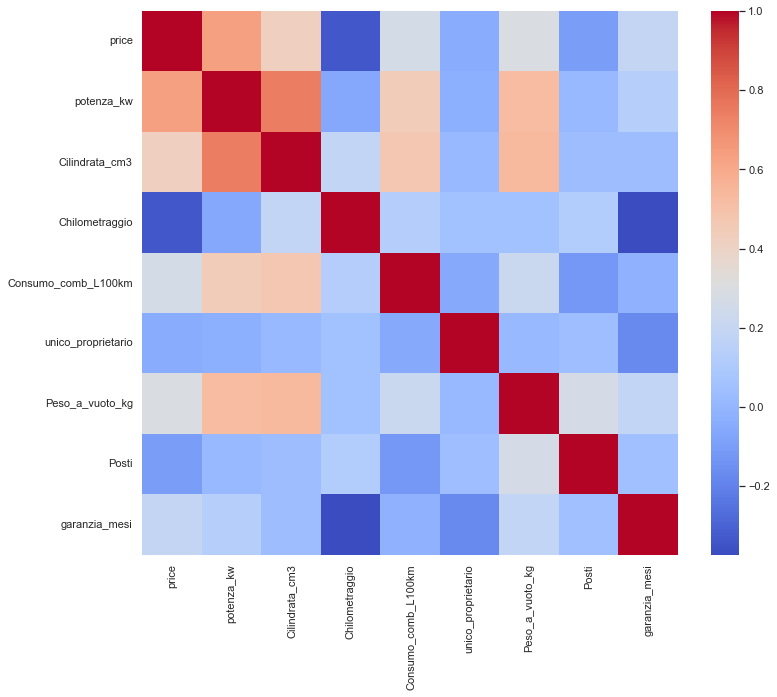

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(var_corr, cmap="coolwarm");

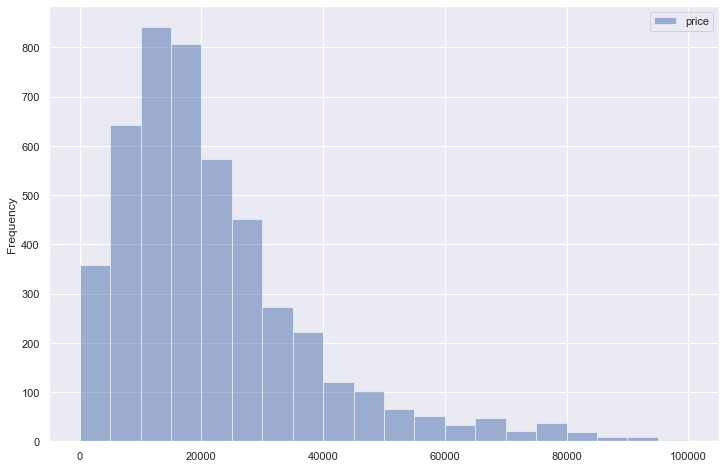

In [21]:
#df['price'].apply(np.log).plot.hist(bins=20 ,legend=True, alpha=0.5, figsize=(12,8))
df['price'].plot.hist(bins=20, range=(0, 1e5), legend=True, alpha=0.5, figsize=(12,8));

Comparing pricese with Lognorm distribuition

In [34]:
shape, loc, scale = stats.lognorm.fit(df.price[df.price<1e5], floc=0.)
dist = stats.lognorm(shape, loc, scale)
rvs = dist.rvs(len(df))

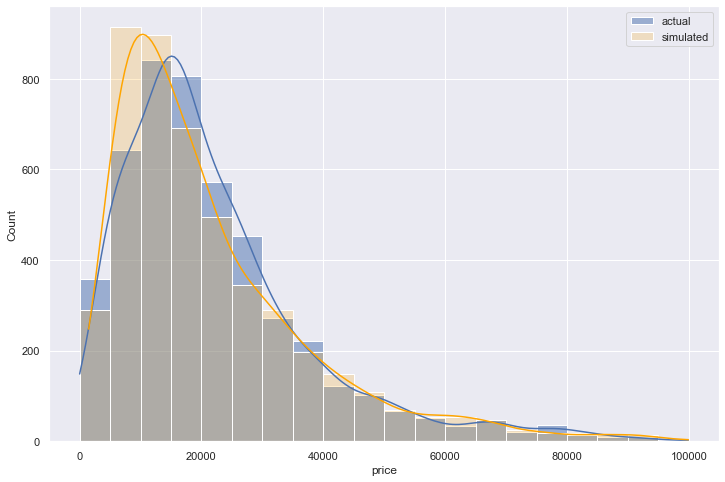

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(df.price[df.price<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label = 'actual');
sns.histplot(rvs[rvs<1e5], bins=np.arange(0, 1e5, 5e3), binrange=(0, 1e5), kde=True, label='simulated', color='orange', alpha=0.2);
plt.legend();

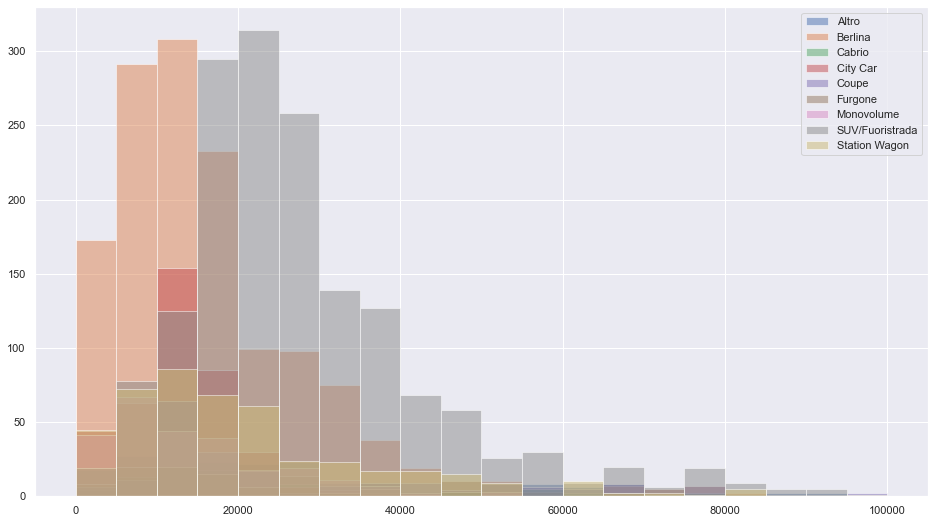

In [23]:
df.groupby('Carrozzeria',sort=True)['price'].hist(bins=20, density=False, range=(0,1e5), alpha=0.5, legend=True, figsize=(16,9));

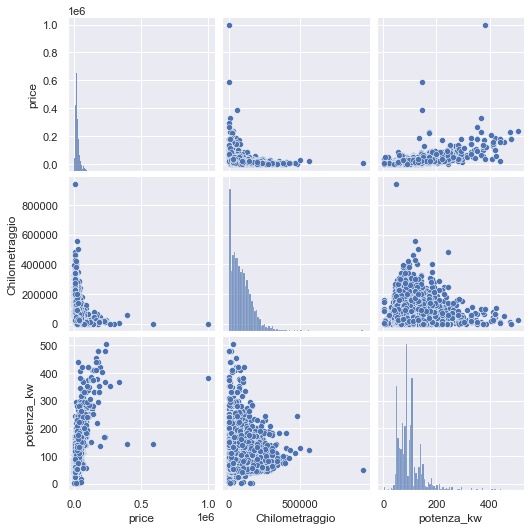

In [25]:
sns.pairplot(df[['price', 'Chilometraggio', 'potenza_kw', 'Anno']]);